In [1]:
import matplotlib.pyplot as plt
import numpy as np
import diagnostics as diag
import numpy.ma as ma
import tracemalloc

In [3]:
#exp = diag.plume('../../data/Nyles/forced_plume_32z/', 'forced_plume_32z')
exp = diag.plume('../../data/Nyles/plume_2days_pressure/', 'plume_2days_pressure')
time = exp.time/3600/24
r_lim = 0.3
z_lim = 0.55

In [24]:
def stratif(z):
    return 1e-2*(z-0.5)

def z_r(b):
    return b/1e-2 + 0.5

In [37]:
b = exp.read_vars('b')['b']

In [40]:
aa = z_r(b)

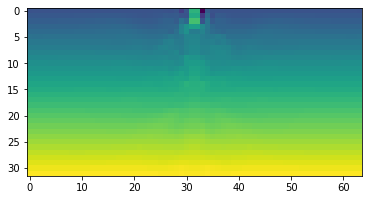

In [43]:
plt.imshow(aa[10, :, :, 31])

In [42]:
aa.shape

(174, 32, 64, 64)

In [28]:
zr = np.linspace(0,2000, 100)

In [30]:
br = stratif(zr)

In [32]:
z_inverser = z_r(br)

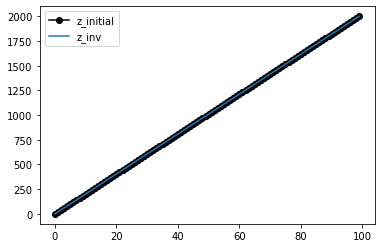

In [36]:
plt.plot(zr, '-ok', label='z_initial')
plt.plot(z_inverser, label='z_inv')
plt.legend()

We selected this parameters to be $r_{lim} = 0.3$ and $z_{lim} = 0.55$.

# Energy budget

![schematic](energy_budget_plume.png)


\begin{equation} 
    \frac{E_b}{dt} = -\phi_{b2} + \phi_E -\epsilon_a \label{subeq:E_b}
\end{equation}

\begin{equation}
    \phi_{b2}= \iiint_V Q \ \frac{b(x,y,z) - b_r(z)}{N^2} dV
\end{equation}
where $Q$ is the heat flux, $b$ is the buoyancy, and $b_r$ is the background buoyancy. The term $\phi_E$ correspond to the input flux of potential energy, defined as

\begin{equation}
    %\phi_{E}= \phi\left( b_1 z_1 - b_0 z_0\right) - Q z_0 - \phi\left(P_1 - P2 \right)
    \phi_{E}= \phi_{E_1} + \phi_{E_2} + \phi_{E_3}
\end{equation}

\begin{equation}
    \phi_{E_1}= \iint_{\text{sides}} b_r(z)z (\vec{u} \cdot \vec{n}) dS 
    ,\quad \phi_{E_2}= \iiint_{V} Qz dV
    \quad\text{and}\quad\phi_{E_3}= \iint_{\text{sides}} p_r(z) (\vec{u} \cdot \vec{n}) dS
\end{equation}

In [8]:
ϕ_E1 = exp.Lateral_flux('br_times_z', r_lim, z_lim)

In [9]:
ϕ_E2 = exp.Volume_integral('Q_times_z', r_lim, z_lim)

In [10]:
ϕ_E3 = exp.Lateral_flux('pr', r_lim, z_lim)

Text(0.5, 0, 'Days')

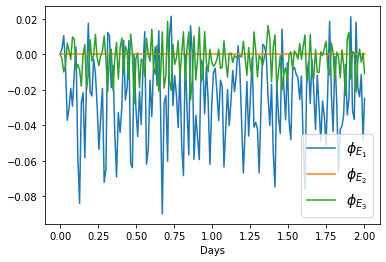

In [11]:
plt.plot(time, ϕ_E1, label='$\phi_{E_1}$')
plt.plot(time, ϕ_E2, label='$\phi_{E_2}$')
plt.plot(time, ϕ_E3, label='$\phi_{E_3}$')
plt.legend(fontsize=14)
plt.xlabel('Days')

## comparison between $\phi_{E_3}$ and $\overline{w'p'}$

In [12]:
wp = exp.Lid_flux('pr', 0.3, 0.55)

In [13]:
total_pr_flux = exp.Surface_flux('pr', 0.3, 0.55)

Text(0.5, 0, 'Days')

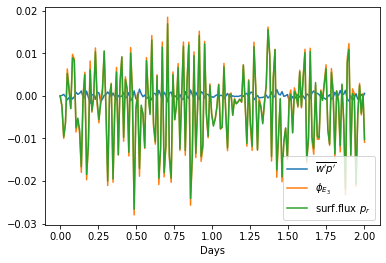

In [15]:
plt.plot(time, wp, label="$\overline{w'p'}$")
plt.plot(time, ϕ_E3, label="$\phi_{E_3}$")
plt.plot(time, total_pr_flux, label="surf.flux $p_r$")
plt.legend()
plt.xlabel('Days')

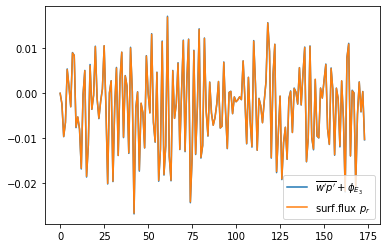

In [17]:
plt.plot(wp + ϕ_E3, label="$\overline{w'p'} + \phi_{E_3}$")
plt.plot(total_pr_flux, label="surf.flux $p_r$")
plt.legend()

## buoyancy_forcing 

In [18]:
ϕ_b2 = exp.buoyancy_forcing()

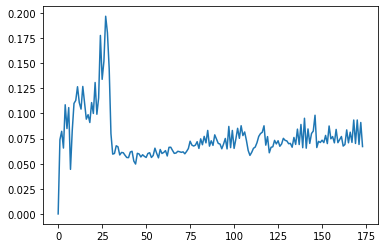

In [19]:
plt.plot(ϕ_b2)

## Buoyancy flux

In [20]:
ϕ_z = exp.Volume_integral('phi_z', r_lim, z_lim)

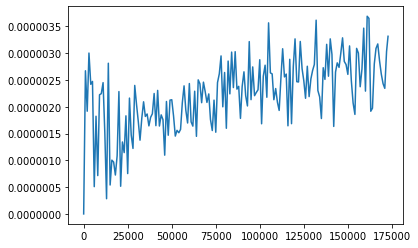

In [21]:
plt.plot(exp.time, ϕ_z)

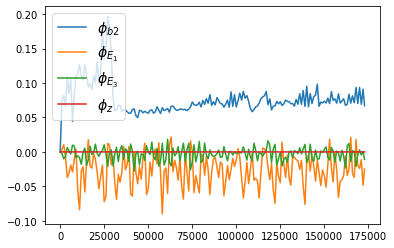

In [22]:
plt.plot(exp.time, ϕ_b2, label='$\phi_{b2}$')
plt.plot(exp.time, ϕ_E1, label='$\phi_{E_1}$')
plt.plot(exp.time, ϕ_E3, label='$\phi_{E_3}$')
plt.plot(exp.time, ϕ_z, label='$\phi_{z}$')
plt.legend(fontsize=14)

In [7]:
%time Ek = exp.Volume_integral('KE', 0.3, 0.55)

CPU times: user 3.41 s, sys: 2.26 s, total: 5.66 s
Wall time: 10.7 s


In [8]:
%time Ea = exp.Volume_integral('APE', 0.3, 0.55)

CPU times: user 1.19 s, sys: 229 ms, total: 1.42 s
Wall time: 1.46 s


In [9]:
Eb = exp.Volume_integral('Eb', r_lim, z_lim)

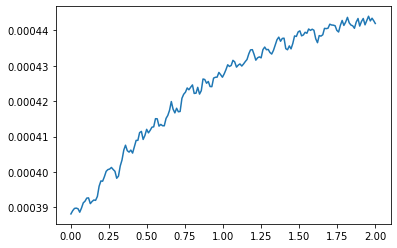

In [12]:
plt.plot(time, Eb, label='$E_b$')

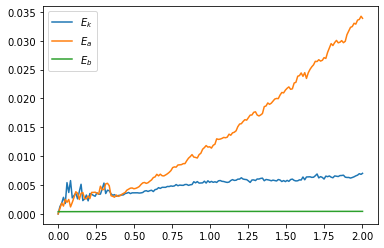

In [11]:
plt.plot(time, Ek, label='$E_k$')
plt.plot(time, Ea, label='$E_a$')
plt.plot(time, Eb, label='$E_b$')
plt.legend()